
# Exploratory Data Analysis 

### Difference between hypothesis testing and exploratory data analysis:

> Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies, to check assumptions with the help of summary statistics and graphical representations.EDA is an approach to data analysis that postpones the usual assumptions about what kind of model the data follow with the more direct approach of allowing the data itself to reveal its underlying structure and model by means of statistical and visualization techniques. Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data.  Hypothesis Testing is basically an assumption that we make about the population parameter. From EDA we get a general idea about the data and then we can propose model for the data or make some hypothesis for some attributes of data and in hypothesis testing we actually validate the proposed model or verify whether the null hypothesis is true or not.
***

### Goal of exploratory data analysis:

> Building analytical model is not the main goal of EDA.The goal of Exploratory Data Analysis is to get a general idea about the data,to maximize insight into a data set,uncover underlying structure,extract important variables,detect patterns,outliers and anomalies with the help of summary statistics and graphical representation.By these we get to know about the data,about the behaviour of different attributes of the data.Without having any idea about the data building analytical model can be very bad choice. We may end up fitting inaccurate models,fitting accurate models on the wrong data,choosing the wrong variables for the model etc.For e.g.- when the relation between two variables is non-linear but we fit a linear regression model to the data. So intial stages are important before going to build analytical model and it is done by EDA. It helps to get an idea about how to proceed and build analytical model. 

### About Missing Data:


> Missing data (or missing values) is defined as the data value that is not stored for a variable in the observation of interest. The problem of missing data is relatively common in almost all research and can have a significant effect on the conclusions that can be drawn from the data Missing data present various problems. First, the absence of data reduces statistical power, which refers to the
probability that the test will reject the null hypothesis when it is false. Second, the lost data can cause bias 
in the estimation of parameters. Third, it can reduce the representativeness of the samples. Fourth, it may complicate the analysis of the study.Each of these distortions may threaten the validity of the trials and can lead  to invalid conclusions.<br>But it depends on the situation whether to replace the data by the mean or mode or not. If we have significant amount of data then some missing values are not going to effect the result much except the data point is a outlier and unless we are interested in outliers.If some random data points are missing then we don't really need to replace it but in other cases we may need to replace it.Again If we have limited data points then missing out some values can be very costly and in these cases we look to replace these values.
***

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as scs
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read the data

In [3]:
### Set the column names(if needed)
col_names=['age','workclass','fnlwgt','education','education_num','marital_status','occupation',
'relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country','income']
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",delimiter=','
               ,names=col_names)

In [4]:
data.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Type and summary statistics associated with each of the attributes in the adult dataset.

### Attribute Type

In [2]:
#It gives the data types of the attributes of Adult dataset
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

### Summary Statistics

In [3]:
print("Summary statistics of Numerical variables:")
data.describe()
print("Summary of Workclass:")
data.workclass.describe()
print("Summary of Education: ")
data.education.describe()
print("Summary of Marital Status:")
data.marital_status.describe()
print("Summary of Ocuupation: ")
data.occupation.describe()
print("Summary of Relationship:")
data.relationship.describe()
print("Summary of Race:")
data.race.describe()
print("Summary of Sex:")
data.sex.describe()
print("Summary of Native Country:")
data.native_country.describe()
print("Summary of Income:")
data.income.describe()

Summary statistics of Numerical variables:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Summary of Workclass:


count        32561
unique           9
top        Private
freq         22696
Name: workclass, dtype: object

Summary of Education: 


count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

Summary of Marital Status:


count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital_status, dtype: object

Summary of Ocuupation: 


count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

Summary of Relationship:


count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object

Summary of Race:


count      32561
unique         5
top        White
freq       27816
Name: race, dtype: object

Summary of Sex:


count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

Summary of Native Country:


count              32561
unique                42
top        United-States
freq               29170
Name: native_country, dtype: object

Summary of Income:


count      32561
unique         2
top        <=50K
freq       24720
Name: income, dtype: object

### Identifying correlation:
> Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.<br>To examine Correlation between two numerical Variables we can compute Pearson Correlation-Co-efficient('r') for the two variables. It is a measure of the strength and direction of the linear relationship between two variables that is defined as the covariance of the variables divided by the product of their standard deviations. The value lies in the range -1 to 1. 'r=0' implies no correlation. Value near '1' implies a strong positive correlation and value near '-1' implies a strong negative correlation.<br> Another simple and useful way to examine the Correlation is to visualize the scatter plot for the two variables. If it shows a increasing pattern of points then there exists a positive correlation, a decresing pattern of points indicates a negative correlation and if the points are randomly scttered then we say that the two variable are not correlated.<br> Another way is to fit a regression model and to check the relation between the variables by examinig R-square value or p-value.The first two methods are mostly used to measure the correlation.<br>
> By looking at the scatter plot we can get an idea about the relationship between the variables.It may be linear,quadratic,exponential or may be no correlation. By computing regression co-efficient we can know whether there is any linear relationship between the variable or not. Now without identifying these we may fit wrong models.Suppose the relationship between the variables is not linear but we may end up fitting a linear regression model. So without checking scatter plot or computing regression co-efficient building a statistical model on the variables may affect these models.

### Why exploratory data analysis?
> Exploratory Data Analysis is very important for data analysis.Our end goal may be to build some model but skipping EDA can be a very bad idea to proceed. The purpose of Exploratory Data Analysis is to maximize insight into a data set, Spotting missing and erroneous data,understanding the underlying structure of the data,identifying the most important variables in the dataset,detect patterns,outliers and anomalies with the help of summary statistics and graphical representation.It gives us an overall idea about the data based on which we may proceed to build models.So if we skip EDA then we may end up fitting inaccurate models,fitting accurate models on the wrong data,choosing the wrong variables for the model,inefficient using the resources inefficiently.For e.g.- when the relation between two variables is non-linear but we fit a linear regression model to the data then we make mistakes but we do EDA than from scatter plot we can get some idea about the relation,again we may end up including a variable in a model though it has no effect on the response variable,detecting patterns is also important in many cases.

### Test to check the independence of categorical Variables:

> Two categorical variables are said to be independent if the conditional distributions on one variable are identical for every category of the other variable. Otherwise, the variables have an association, or relationship.
<br> The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of each category for one nominal variable is compared across the categories of the second nominal variable.  The data can be displayed in a contingency table where each row represents a category for one variable and each column represents a category for the other variable.  For example, say a researcher wants to examine the relationship between gender (male vs. female) and empathy (high vs. low).  The chi-square test of independence can be used to examine this relationship.  The null hypothesis for this test is that there is no relationship between gender and empathy.  The alternative hypothesis is that there is a relationship between gender and empathy (e.g. there are more high-empathy females than high-empathy males).<br>
We set the following hypothesis and then test whether the null hypothesis is true or not.<br>
**Null hypothesis**: Assumes that there is no association between the two variables.<br>
**Alternative hypothesis**: Assumes that there is an association between the two variables.<br>
**Hypothesis testing**: Hypothesis testing for the chi-square test of independence as it is for other tests like ANOVA, where a test statistic is computed and compared to a critical value. The test statistic is computed as- sum [(O-E)^2/E] where 'O' is the observed cell frequency and 'E' is expected cell frequency of a cell.The critical value is based on the Chi-square distribution with some degrees of freedom and level of significance of the test(Here 5%) . The degrees of freedom for the chi-square are calculated using the following formula: df = (r-1)(c-1) where r is the number of rows and c is the number of columns. If the observed chi-square test statistic is greater than the critical value, the null hypothesis can be rejected at given level of significance and if the null hypothesis is rejected then we conclude that the two categorical attributes are associated i.e not independent. So in this way we can test whether the two categorical variables are independent or not.
***

### Some tools to determine documentation about the attributes in the dataset and about how the data was generated:

mp program is a compiler to parse formal metadata, checking the syntax against the FGDC Content Standard for Digital Geospatial Metadata and generating output suitable for viewing with a web browser or text editor. It runs on Linux and UNIX systems and on PC's running all versions of Microsoft Windows (95 and up including XP). MP generates a textual report indicating errors in the metadata, primarily in the structure but also in the values of some of the scalar elements.
Metadata can be of different types:

* Descriptive metadata describes a resource for purposes such as discovery and identification. It can include elements such as title, abstract, author, and keywords.
* Structural metadata is metadata about containers of data and indicates how compound objects are put together, for example, how pages are ordered to form chapters. It describes the types, versions, relationships and other characteristics of digital materials. 
* Administrative metadata provides information to help manage a resource, such as when and how it was created, file type and other technical information, and who can access it.
* Reference metadata describes the contents and quality of statistical data
* Statistical metadata may also describe processes that collect, process, or produce statistical data; such metadata are also called process data.



### Maximum and minimum values for age and education_num

In [4]:
print("Minimum value of age =", data['age'].min())
print("Maximum value of age =", data['age'].max())
print("Minimum value of education_num =", data['education_num'].min())
print("Maximum value of education_num =", data['education_num'].max())

Minimum value of age = 17
Maximum value of age = 90
Minimum value of education_num = 1
Maximum value of education_num = 16


### Discretizing age and the education-num attributes. How do we decide the number of bins and how to Use the Freedman-Diaconis rule to determine the number of bins.

> To discretize the attribute we first check the minimum and maximum values for the attribute.Based on these values we can divide the total range in some equisized groups. For age,the minimum is 17 and maximum is 90.We can divide it in 10 equisized groups of size (90-17)/10=7.3 .The groups will look like  [17 - 24.3] , [24.3 - 31.6] and so on.For education-num,the minimum is 1 and maximum is 16. So we can divide it in 5 equisized groups of size (16.5-0.5)/5=3.2 (we need to adjust for the class boundaries as a value can fall in two groups).The groups will look like  [0.5 - 3.7] , [3.7 - 6.9] and so on. As there are no fractional values in both of the columns, so taking closed intervals will not cause any problem. Based on the range of the attribute we can decide the no of bins.We can done it in a better way.A rule to decide the number of bins is Freedman-Diaconis rule.

>The Freedman–Diaconis rule can be used to select the width of the bins to be used in a histogram.It is named after David A. Freedman and Persi Diaconis.<br>
The general equation for the rule is:<br>
> ## $\frac{2\ \times \ IQR(x)}{\sqrt[3]{n}}$<br>
where IQR(x) is the inter-quartile range of the sample x and n is the number of observations of the sample x.We then obtain the no of bins using the range of the attribute and the binwidth we obtained by this rule.

### Discretizing age and education-num by Freedman-Diaconis Rule


In [5]:
from scipy.stats import iqr
age_iqr = iqr(data['age'])
enum_iqr = iqr(data['education_num'])
age_binwidth = (2*age_iqr)/(data['age'].count()**(1/3))
enum_binwidth = (2*enum_iqr)/(data['education_num'].count()**(1/3))

print("Bin width for age:",age_binwidth) 
print("Bin width for education num:",enum_binwidth) 

Bin width for age: 1.2526432809331143
Bin width for education num: 0.18789649213996712


In [6]:
## Bins for age 
age_bins= np.arange(16.99,90+age_binwidth,1.2526432809331143)
#No of age bins is : count(age_bins)-1
age_freq= data.groupby(pd.cut(data['age'], bins=age_bins)).size()
print ("Age Table:")
age_freq

## Bins for education_num
enum_bins = np.arange(0.99,16+enum_binwidth,0.18789649213996712)
enum_freq = data.groupby(pd.cut(data['education_num'], bins=enum_bins)).size()
print ("Education-num Table:",enum_freq)


Age Table:


age
(16.99, 18.243]      945
(18.243, 19.495]     712
(19.495, 20.748]     753
(20.748, 22.001]    1485
(22.001, 23.253]     877
(23.253, 24.506]     798
(24.506, 25.759]     841
(25.759, 27.011]    1620
(27.011, 28.264]     867
(28.264, 29.516]     813
(29.516, 30.769]     861
(30.769, 32.022]    1716
(32.022, 33.274]     875
(33.274, 34.527]     886
(34.527, 35.78]      876
(35.78, 37.032]     1756
(37.032, 38.285]     827
(38.285, 39.538]     816
(39.538, 40.79]      794
(40.79, 42.043]     1588
(42.043, 43.296]     770
(43.296, 44.548]     724
(44.548, 45.801]     734
(45.801, 47.053]    1445
(47.053, 48.306]     543
(48.306, 49.559]     577
(49.559, 50.811]     602
(50.811, 52.064]    1073
(52.064, 53.317]     464
(53.317, 54.569]     415
(54.569, 55.822]     419
(55.822, 57.075]     724
(57.075, 58.327]     366
(58.327, 59.58]      355
(59.58, 60.833]      312
(60.833, 62.085]     558
(62.085, 63.338]     230
(63.338, 64.59]      208
(64.59, 65.843]      178
(65.843, 67.096]     

Education-num Table: education_num
(0.99, 1.178]         51
(1.178, 1.366]         0
(1.366, 1.554]         0
(1.554, 1.742]         0
(1.742, 1.929]         0
(1.929, 2.117]       168
(2.117, 2.305]         0
(2.305, 2.493]         0
(2.493, 2.681]         0
(2.681, 2.869]         0
(2.869, 3.057]       333
(3.057, 3.245]         0
(3.245, 3.433]         0
(3.433, 3.621]         0
(3.621, 3.808]         0
(3.808, 3.996]         0
(3.996, 4.184]       646
(4.184, 4.372]         0
(4.372, 4.56]          0
(4.56, 4.748]          0
(4.748, 4.936]         0
(4.936, 5.124]       514
(5.124, 5.312]         0
(5.312, 5.5]           0
(5.5, 5.687]           0
(5.687, 5.875]         0
(5.875, 6.063]       933
(6.063, 6.251]         0
(6.251, 6.439]         0
(6.439, 6.627]         0
                    ... 
(10.385, 10.573]       0
(10.573, 10.761]       0
(10.761, 10.949]       0
(10.949, 11.136]    1382
(11.136, 11.324]       0
(11.324, 11.512]       0
(11.512, 11.7]         0
(11.7, 11.888] 

### Age histogram of the people who earn more than 50 K


In [7]:
age_inc=data[data['income'] == ' >50K'].age
print("Maximum value of age for the people who earn more than 50K:")
max(age_inc)
print("Minimum value of age for the people who earn more than 50K:")
min(age_inc)
print("Total no of people earning more than 50K:")
age_inc.size

Maximum value of age for the people who earn more than 50K:


90

Minimum value of age for the people who earn more than 50K:


19

Total no of people earning more than 50K:


7841

In [8]:
age_inc_iqr = iqr(age_inc)
age_inc_binwidth = (2*age_inc_iqr)/(age_inc.count()**(1/3))
print("Binwidth:",age_inc_binwidth)
age_inc_bins= np.arange(18.99,90+age_inc_binwidth,age_inc_binwidth)
print("Required no of bins:",age_inc_bins.size -1)


Binwidth: 1.5100712416056383
Required no of bins: 48


### Histogram (Bins obtained using Freedman-Diaconis Rule )

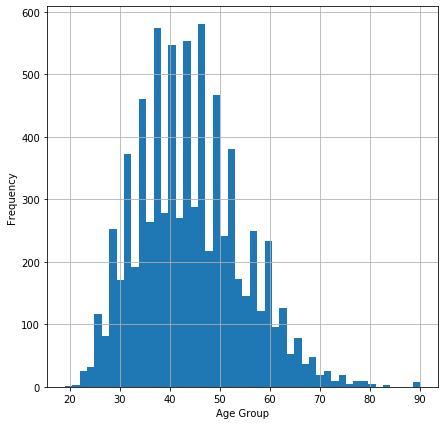

In [11]:
hist = data[data['income'] == ' >50K'].age.hist(bins =48, figsize=(7,7))
plt.xlabel("Age Group")
plt.ylabel("Frequency")
plt.show();

### Proportion of males and females in the group that earns more than 50 K

In [12]:
#data.loc[data['income']==' >50K','sex'].value_counts()
count=data[data['income']==' >50K'].sex.value_counts()
#count
print("The proportion of males and females in the group that earns more than 50K is:")
prop=count/count.sum()
prop

The proportion of males and females in the group that earns more than 50K is:


 Male      0.849637
 Female    0.150363
Name: sex, dtype: float64

### Checking the independence of gender and income (Chi-square test of independence)

In [13]:
con_table = pd.crosstab(data.sex,data.income,margins=True)
con_table
f_obs = np.array([con_table.iloc[0][0:2].values,
                  con_table.iloc[1][0:2].values])
f_obs

print("(Value of test-statistic,p-value,degrees of freedom):",stats.chi2_contingency(f_obs)[0:3])


income,<=50K,>50K,All
sex,,,
Female,9592,1179,10771
Male,15128,6662,21790
All,24720,7841,32561


array([[ 9592,  1179],
       [15128,  6662]])

(Value of test-statistic,p-value,degrees of freedom): (1517.813409134445, 0.0, 1)


In this case,our null hypothesis is:"Gender and Income are independent" <br>
Our alternative hypothesis is:"Gender and Income are not independent i.e they are associated"<br>
We will say that the null hypothesis is rejected at 5% Level of significance if our test statistic is greater than some critical value.The test statistic is computed as- sum [(O-E)^2/E] where 'O' is the observed cell frequency and 'E' is expected cell frequency of a cell.The critical value is based on the Chi-square distribution with degrees of freedom 1 and level of significance of the test(Here 5%) . we finally obtain the p-value as 0.0 which is less than 0.05. So we reject the null hypothesis at 5% L.O.S and conclude that Gender and Income are not independent.      

### Separating the numerical variables of the dataset into a separate dataframe.Then we plot the scatter matrix for each pair of variables.

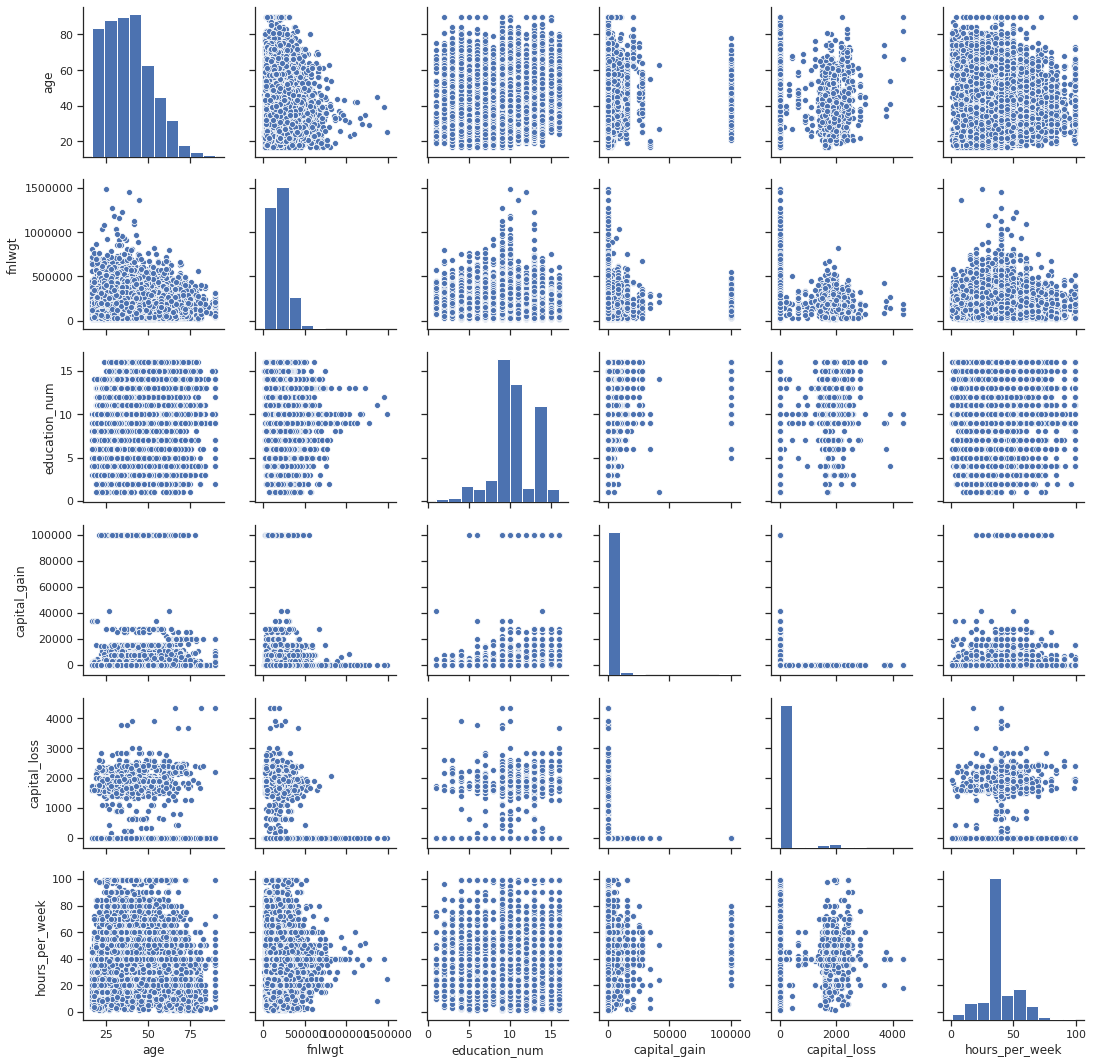

In [14]:
data_num = pd.DataFrame(data.loc[:,data.dtypes == 'int64'])

import seaborn as sns
sns.set(style="ticks")
sns.pairplot(data_num)

### Some examples of attribute noise include: i.Unknown or missing values,ii. Incorrect values (values that violate the range of values possible for the attribute).

### Here we check for the noisy attributes in the dataset.

In [15]:
#Checking whether there is any missing value or not
#data.isnull().any()
#data.info()
data.columns
for i in data.columns:
    print("Unique values of",i)
    data[i].unique()


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

Unique values of age


array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87])

Unique values of workclass


array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Unique values of fnlwgt


array([ 77516,  83311, 215646, ...,  34066,  84661, 257302])

Unique values of education


array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

Unique values of education_num


array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8])

Unique values of marital_status


array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

Unique values of occupation


array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Unique values of relationship


array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

Unique values of race


array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

Unique values of sex


array([' Male', ' Female'], dtype=object)

Unique values of capital_gain


array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

Unique values of capital_loss


array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411])

Unique values of hours_per_week


array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

Unique values of native_country


array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

Unique values of income


array([' <=50K', ' >50K'], dtype=object)

In [16]:
#from the unique values we see that some of the attributes have missing values.
#No of missing values for those attributes
print("The no of missing values for workclass:")
data.loc[data['workclass']==' ?'].workclass.count()
print("The no of missing values for occupation:")
data.loc[data['occupation']==' ?'].occupation.count()
print("The no of missing values for native_country:")
data.loc[data['native_country']==' ?'].native_country.count()

The no of missing values for workclass:


1836

The no of missing values for occupation:


1843

The no of missing values for native_country:


583

We can see that the columns workclass,occupation,native-country have large no of missing values.So these attributes are noisy attributes.
Again for capital_gain attribute we observe that some of the values are extremely different from most of the values in the dataset. They may be outliers but there is high chance that these inconsistent values are due to some data-entry error.These are type of incorrect value.So capital_gain is also a noisy attribute.
For fnlwgt, we observe from the unique values and also from the boxplot (below) that there are lot of extreme values. They are possibly all outliers and fnglt is possibly not a noisy attribute. So we have total 4 noisy attribute in the data.They are- workclass,occupation,native-country,capital-gain

### Interquartile-Range of an attribute and box-plots for the continuous attributes(To determine outliers)

> The IQR is a measure of variability, based on dividing a dataset into quartiles. Quartiles divide a 
rank-ordered dataset into four equal parts. The values that separate parts are called the first, second,
and third quartiles and they are denoted by Q1, Q2, and Q3, respectively.IQR is the difference between 
75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 −  Q1

> The interquartile range is often used to find outliers in data. Outliers here are defined as observations that fall below Q1 − 1.5* IQR or above Q3 + 1.5* IQR. If a observation falls below Q1 − 3* IQR or above Q3 + 3* IQR then these observations are called extreme outliers. In a boxplot, the highest and lowest occurring value within this limit are indicated by whiskers of the box (frequently with an additional bar at the end of the whisker) and any outliers as individual points.



### Box plots

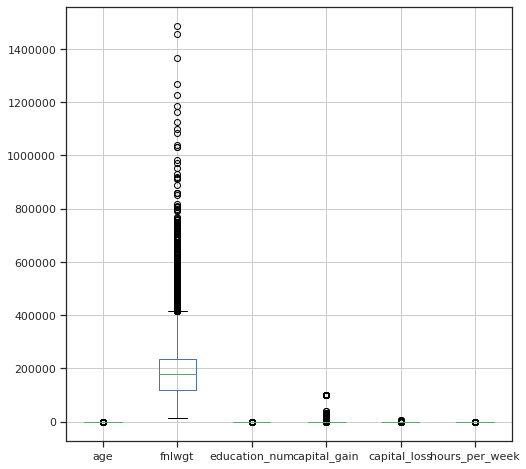

In [17]:
#Boxplot for all the numerical variables together
data.boxplot(figsize=(8,8))

### Visualize the plots separately

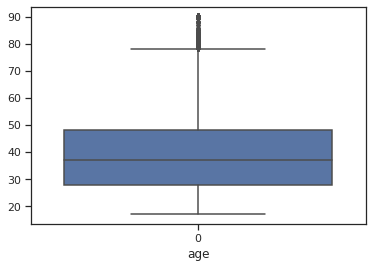

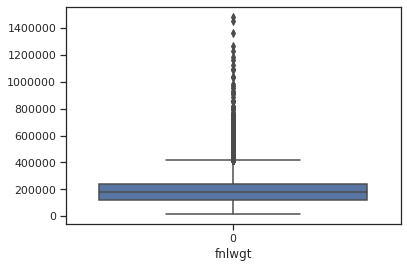

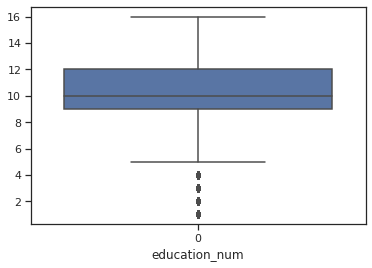

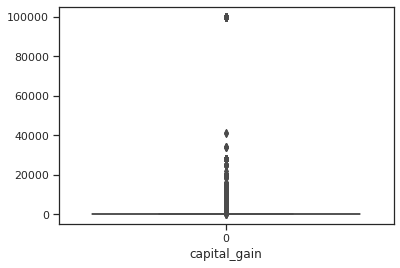

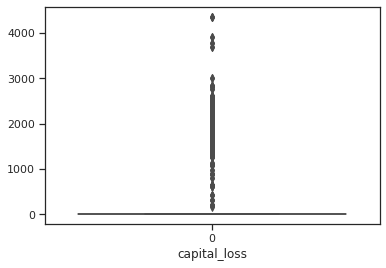

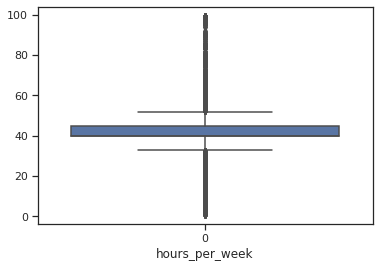

In [19]:
#To visualize the plots more clearly or to study them separately
for column in data_num:
    plt.figure()
    sns.boxplot(data=data_num[column])
    plt.xlabel(column)
plt.show();